Dataset Overview:
   Study_Hours  Attendance  Pass
0           10          90     1
1           15          85     1
2            7          75     0
3           20          95     1
4           25          98     1

Missing Values:
Study_Hours    0
Attendance     0
Pass           0
dtype: int64


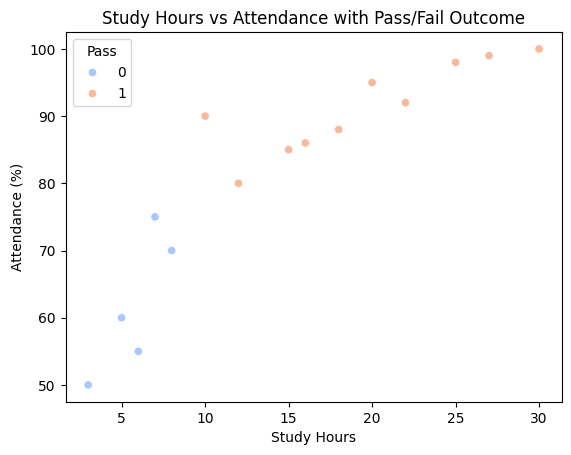

Accuracy: 1.00

Confusion Matrix:
[[1 0]
 [0 2]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = {
    'Study_Hours': [10, 15, 7, 20, 25, 5, 30, 12, 18, 6, 22, 16, 8, 27, 3],
    'Attendance': [90, 85, 75, 95, 98, 60, 100, 80, 88, 55, 92, 86, 70, 99, 50],
    'Pass': [1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0]
}

df = pd.DataFrame(data)

# Data Exploration
print("Dataset Overview:")
print(df.head())
print("\nMissing Values:")
print(df.isnull().sum())

# Visualizing Relationships
sns.scatterplot(x=df['Study_Hours'], y=df['Attendance'], hue=df['Pass'], palette='coolwarm')
plt.xlabel("Study Hours")
plt.ylabel("Attendance (%)")
plt.title("Study Hours vs Attendance with Pass/Fail Outcome")
plt.show()

# Splitting the dataset
X = df[['Study_Hours', 'Attendance']]
y = df['Pass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)


Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



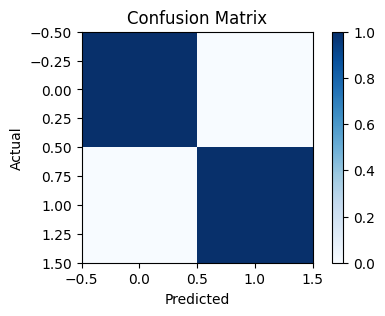

C:\Users\deepi\AppData\Local\Temp\ipykernel_6480\2437784301.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Sentiment'], palette='coolwarm')


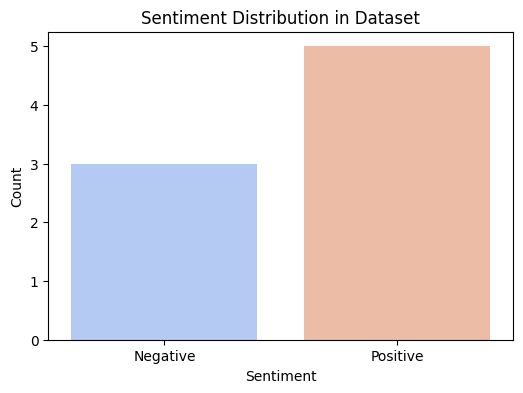

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Sample dataset
data = {
    'Review': [
        "I love this product!",
        "Horrible experience, waste of money!",
        "Pretty decent, could be better.",
        "Absolutely fantastic!",
        "Not worth the price.",
        "Great value, satisfied.",
        "Worst purchase ever!",
        "Good quality, slow shipping."
    ],
    'Sentiment': [1, 0, 1, 1, 0, 1, 0, 1]  
}

df = pd.DataFrame(data)

# Vectorization using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Review'])
y = df['Sentiment']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = MultinomialNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)

# Visualization of Confusion Matrix
plt.figure(figsize=(5, 3))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Bar Chart for Sentiment Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Sentiment'], palette='coolwarm')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution in Dataset")
plt.show()
